In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno # library to visualize missing values
import seaborn as sns # library for statistical data visualization

In [27]:
"""Read dataset"""
data = pd.read_csv('recipes.csv', encoding = 'latin1')
data.head()

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize(L),BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp(C),PrimingMethod,PrimingAmount
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73797 entries, 0 to 73796
Data columns (total 19 columns):
Style             73797 non-null object
StyleID           73797 non-null int64
Size(L)           73797 non-null float64
OG                73797 non-null float64
FG                73797 non-null float64
ABV               73797 non-null float64
IBU               73797 non-null float64
Color             73797 non-null float64
BoilSize(L)       73797 non-null float64
BoilTime          73797 non-null int64
BoilGravity       70807 non-null float64
Efficiency        73797 non-null float64
MashThickness     43957 non-null float64
SugarScale        73797 non-null object
BrewMethod        73797 non-null object
PitchRate         34583 non-null float64
PrimaryTemp(C)    51165 non-null float64
PrimingMethod     6759 non-null object
PrimingAmount     4770 non-null object
dtypes: float64(12), int64(2), object(5)
memory usage: 10.7+ MB
None


In [4]:
"""Check for NaN"""
print("Rows in dataset %d" % data.size)
print(data.isnull().sum())

Rows in dataset 1402143
Style                 0
StyleID               0
Size(L)               0
OG                    0
FG                    0
ABV                   0
IBU                   0
Color                 0
BoilSize(L)           0
BoilTime              0
BoilGravity        2990
Efficiency            0
MashThickness     29840
SugarScale            0
BrewMethod            0
PitchRate         39214
PrimaryTemp(C)    22632
PrimingMethod     67038
PrimingAmount     69027
dtype: int64


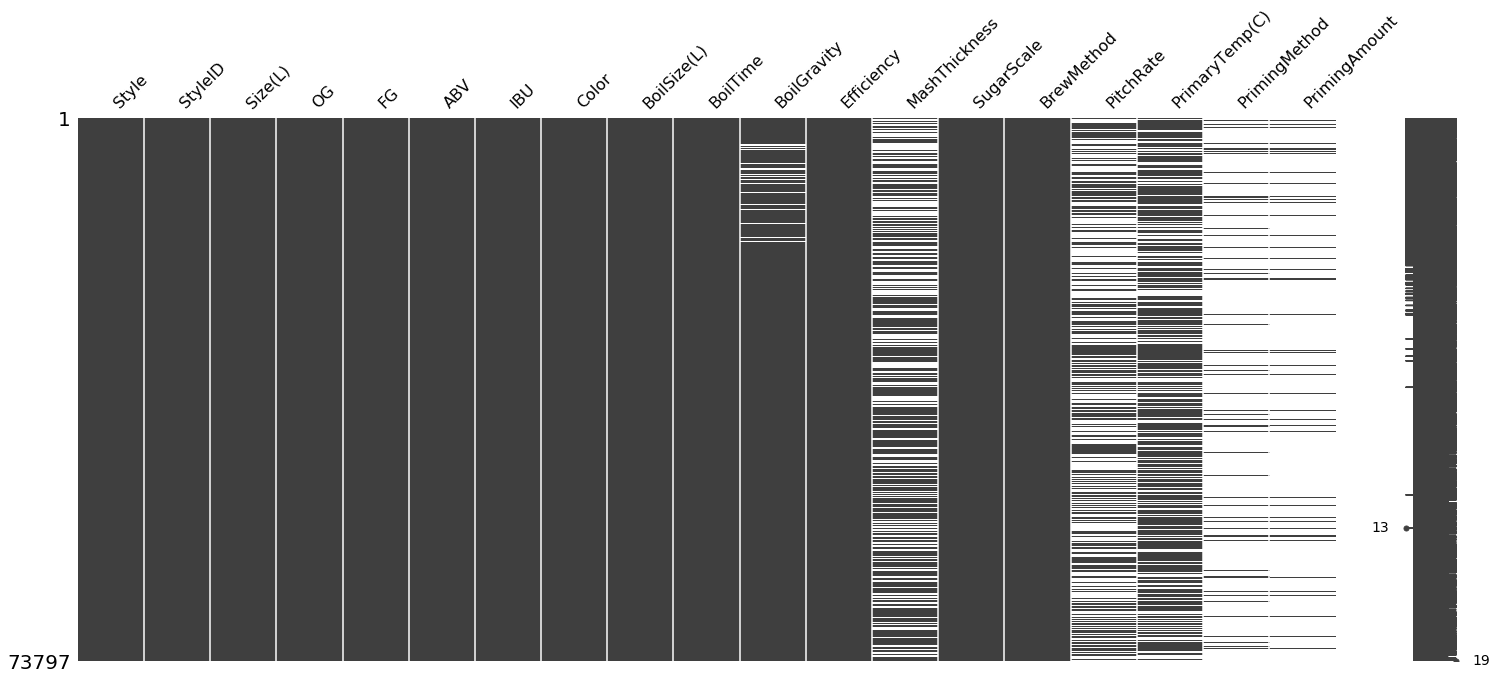

In [16]:
%matplotlib inline
msno.matrix(data)

Number of distinct types = 176


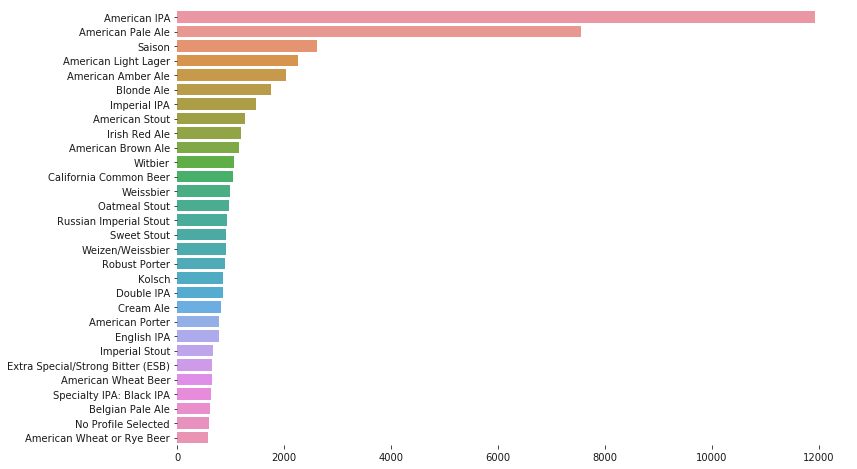

In [36]:
"""Unique labels (Style and StyleID)"""
styles = data['Style'].unique()
assert(styles.size == data['StyleID'].unique().size)
print("Number of distinct types = %d" % styles.size)
freq = {}
for style in styles:
    freq[style] = (sum(data['Style'] == style))
    #print("Style = %s, times = %d" % (style, freq[style]))

def draw_bar_chart(n, freq):
    import operator
    x = []
    y = []
    sorted_dict = sorted(freq.items(), key = operator.itemgetter(1), reverse = True)
    
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    
    sns.set_color_codes("pastel")
    x = [t[1] for t in sorted_dict[:n]]
    y = [t[0] for t in sorted_dict[:n]]
    sns.barplot(x=x, y=y)
    sns.despine(left=True, bottom=True)
    plt.show()
    
draw_bar_chart(30, freq)

# Categorial Features

In [47]:
"""List of categorial features"""
print(list(data.select_dtypes(include=object).columns))

['Style', 'SugarScale', 'BrewMethod', 'PrimingMethod', 'PrimingAmount']


In [38]:
"""Priming Amount"""
print(data.PrimingAmount.unique())

['4.5 oz' nan '6-7 g sukker/l' ..., '36 hours' '.5 gal'
 '4.79oz for 6gal  4.5oz for 5.75  4.32 for 5.5gal  4.12oz for 5.25gal  3.93oz for 5 gal.']


SugarScale has 0 null values


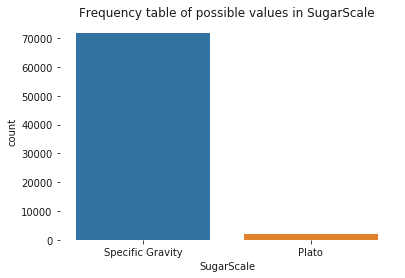

In [40]:
"""SugarScale"""
ax = sns.countplot(x='SugarScale', data=data)
ax.set(title='Frequency table of possible values in SugarScale')
sns.despine(left=True, bottom=True)

print('SugarScale has {} null values'.format(data.SugarScale.isnull().sum()))

BrewMethod has 0 null values


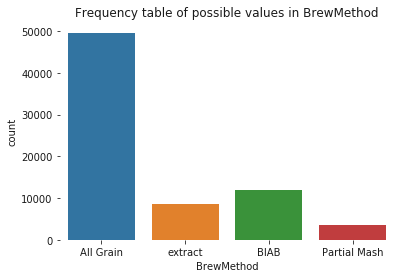

In [44]:
"""Brew method"""
ax = sns.countplot(x='BrewMethod', data=data)
ax.set(title='Frequency table of possible values in BrewMethod')
sns.despine(left=True, bottom=True)

print('BrewMethod has {} null values'.format(data.BrewMethod.isnull().sum()))

In [48]:
"""PrimingMethod"""

print('PrimingMethod has {} unique values'.format(data.PrimingMethod.nunique()))
print(data.PrimingMethod.unique()[:20])
print('PrimingMethod has {} null values'.format(data.PrimingMethod.isnull().sum()))

PrimingMethod has 870 unique values
['corn sugar' nan 'Sukkerlake' 'Corn Sugar' 'Priming Sugar'
 'Keg - Force Carb.' 'Force Carb' 'Force carb' 'Forced Carbonation'
 'DME boiled in 2 cups water' 'force carb' 'Dextrose' 'Sukker' 'Sugar'
 'FORCED CARB' 'Inverted sugar' 'honey' 'CO2' 'Add in last 5 of boil'
 'priming sugar']
PrimingMethod has 67038 null values


# Numerical Features